In [1]:
import numpy as np # Algebra
import matplotlib.pyplot as plt # Plottear
%matplotlib inline
# para poder plottear acá. Particular de las Jupyter Notebooks

# Neural Networks
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import keras.backend as K # Para obtener info del modelo

In [2]:
# ################  Data ###########################################

m = 1000 # #muestras
ni = 10 # #features de entrada
no = 20 # #features de salida

data = np.random.rand(m,ni+no) # generando algo
print('Shape:', data.shape)
print('Max value: ', data.max(), 'Min value:', data.min())

# Data Set split
# Tb hay librerías que lo hacen mas elegante (sklearn.model_selection.train_test_split)

trainPortion = 0.8
testPortion = 1-trainPortion

XTrain = data[:int(trainPortion*m),:ni]
YTrain = data[:int(trainPortion*m),ni:]

XTest = data[int(trainPortion*m):,:ni]
YTest = data[int(trainPortion*m):,ni:]

print('Train Data Shape: Input:', XTrain.shape, 'Output:', YTrain.shape)
print('Test Data Shape: Input:', XTest.shape, 'Output:', YTest.shape)


Shape: (1000, 30)
Max value:  0.9999929695198475 Min value: 6.644418630574744e-05
Train Data Shape: Input: (800, 10) Output: (800, 20)
Test Data Shape: Input: (200, 10) Output: (200, 20)


In [3]:
# ############### NN Model Definition ################################
# (una de las formas)

# Dense Fully connected NNs
hiddenNeurons1 = 20
hiddenNeurons2 = 20

# Modelo denso (fully connected). Dos hidden layers
# (Y definicion de la entrada junto con la primer hidden layer)
model = Sequential()
model.add(Dense(hiddenNeurons1, activation='sigmoid', input_shape=(ni,)))
model.add(Dense(hiddenNeurons2, activation='relu'))
model.add(Dense(no, activation='linear'))

print(model.summary())

# Compile Model
# Acá se define el optimizer, cost function, métricas, learning rate,etc.
model.compile(optimizer='adam', loss='mse', metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
Total params: 1,060
Trainable params: 1,060
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2921 - acc: 0.0437
Epoch 2/20
25/25 [==============================] - 0s 977us/step - loss: 0.1938 - acc: 0.0475
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1453 - acc: 0.0538
Epoch 4/20
25/25 [==============================] - 0s 958us/step - loss: 0.1190 - acc: 0.0538
Epoch 5/20
25/25 [==============================] - 0s 922us/step - loss: 0.1036 - acc: 0.0613
Epoch 6/20
25/25 [==============================] - 0s 935us/step - loss: 0.0943 - acc: 0.0538
Epoch 7/20
25/25 [==============================] - 0s 963us/step - loss: 0.0890 - acc: 0.0500
Epoch 8/20
25/25 [==============================] - 0s 957us/step - loss: 0.0863 - acc: 0.0500
Epoch 9/20
25/25 [==============================] - 0s 998us/step - loss: 0.0850 - acc: 0.0550
Epoch 10/20
25/25 [==============================] - 0s 936us/step - loss: 0.0846 - acc: 0.0538
Epoch 11/20
25/25 [==============================] - 

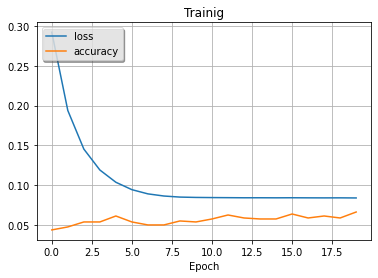

In [4]:
# ############### Train ##############################################

epochs = 20 # 400 # número de "pasadas" por todo el training data
batchSize = 32 # cuántas muestras toma para cada iteración

history = model.fit(XTrain, YTrain, epochs=epochs, batch_size=batchSize, verbose=1)

# Plot history
fig1, ax1 = plt.subplots()
ax1.plot(history.history['loss'], label = 'loss')
ax1.plot(history.history['acc'], label = 'accuracy')
plt.title('Trainig')
plt.xlabel('Epoch')
ax1.legend(shadow=True, framealpha =0.7, loc = 2)
ax1.grid(True)

print('\nObvio que no va a aprender un joraca si las entradas y salidas son random no?')

In [5]:
# ################ Evaluate ###########################################
    
# Train Data Loss (Que tienen q coincidir con los últimos valore de la curva)
trainLoss, trainAcc = model.evaluate(XTrain,YTrain, verbose=1)
print('Train Loss:', trainLoss, 'Accuracy:', trainAcc)

# Test Data Loss
testLoss, testAcc = model.evaluate(XTest,YTest, verbose=1)
print('Test Loss:', testLoss, 'Accuracy:', testAcc)

25/25 [==============================] - 0s 861us/step - loss: 0.0838 - acc: 0.0637
Train Loss: 0.08379752188920975 Accuracy: 0.0637499988079071
7/7 [==============================] - 0s 1ms/step - loss: 0.0841 - acc: 0.0450
Test Loss: 0.08413594961166382 Accuracy: 0.04500000178813934


In [6]:
# ############### Get Model Data ######################################
# from mytools.mykerastools import getKerasModelData
# modelData = getKerasModelData(model)
# print(model.Data.keys())